In [1]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the GcExport.csv from the data folder
# Skipping the first row of the export since it only says "batting" and "pitching"
# With usecols we can filter on the columns we need
# Use index_col=0 to make the players Number the index for the rows

gc_stats = pd.read_csv('data/ERMS.csv', skiprows=1, usecols=['Number', 'First', 'Last', 'GP', "AVG", "OBP"])

In [3]:
# Please fill in any blank cells in the spreadsheet for the players or they will be dropped
# You can look to see if there are any blanks by just running gc_stats and looking at the datafram
# gc_stats.dropna() will drop the NaN row, the Totals row, and the Glossary row

gc_stats = gc_stats.dropna()

In [5]:
# Display gc_stats

gc_stats

,Number,Last,First,GP,AVG,OBP
0,4,Pearson,Faith,13,.154,.333
1,6,Elliott,Abbie,11,.091,.375
2,9,Lepley,Adrianna,0,.000,.000
3,11,Pennington,Allye,9,.500,.607
4,12,Ghee,Harlee,13,.296,.441
5,13,Smith,Izzy,13,.414,.514
6,14,Wix,Gray,13,.087,.323
7,18,Vaughan,Zoe,1,.000,.000
8,21,Gregory,Kelsey,13,.381,.581
9,24,Teasley,Kimber,9,.111,.385


In [6]:
# Convert all the numeric columns (Number, GP, AVG, OBP) from string to numeric

gc_stats["AVG"] = pd.to_numeric(gc_stats["AVG"]) * 1000
gc_stats["AVG"] = gc_stats["AVG"].astype(int)
gc_stats["Number"] = pd.to_numeric(gc_stats["Number"])
gc_stats["GP"] = pd.to_numeric(gc_stats["GP"])
gc_stats["OBP"] = pd.to_numeric(gc_stats["OBP"]) * 1000
gc_stats["OBP"] = gc_stats["OBP"].astype(int)

In [7]:
# Display the players that have played over 7 games this season and save as gc_team. I do this so we don't get a bunch of temp players and pickups in the plot
# You can change the value of GP to anything you need

gc_team = gc_stats[gc_stats["GP"] > 1]

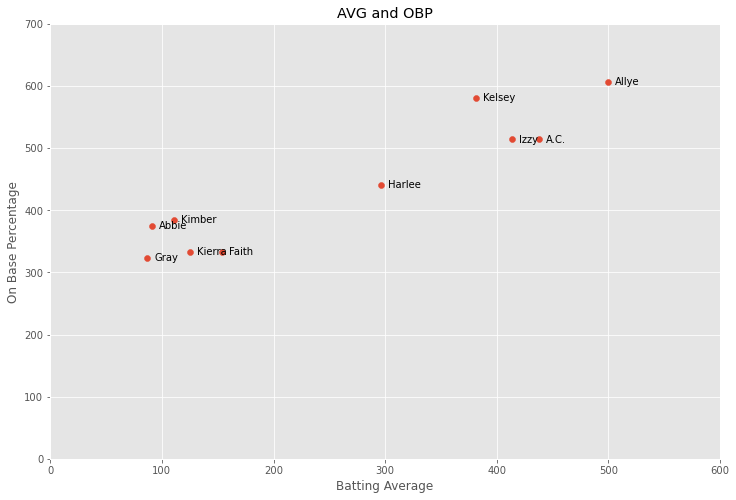

In [15]:
# Plot the AVG column on the x-axis and the OBP column on the y-axis
# plt.xlim and plt.ylim moves the graph out to 1.0 which is a 1000 batting average and 1000 on base percentage
# plt.figure increases the plot size so the scatter plot is not so crowded
fig = plt.figure(figsize=(12,8))
plt.style.use('ggplot')
plt.scatter(gc_team["AVG"], gc_team["OBP"])
plt.xlabel("Batting Average")
plt.ylabel('On Base Percentage')
plt.title('AVG and OBP')
plt.grid()
plt.xlim((0,600))
plt.ylim((0,700))


for x_pos, y_pos, label in zip(gc_team["AVG"], gc_team["OBP"], gc_team["First"]):
    plt.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

# plt.savefig('avg_obp.png') 
# gc_team_t = np.transpose(gc_team)

#plt.grid() shows grid lines on the plot
plt.grid()

plt.show()